In [17]:
import json
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [77]:
def load_data(fname, keys=['current', 'displacement', 'position']):
    """ Load a json file with recordings
    """
    with open(fname, 'r') as fp:
        data = json.load(fp)

    t = np.array(sorted(data.keys())).astype("int")
    data[str(t[0])]

    active_motors = [3,5,6,10,12]

    return [ np.array([ data[str(t[i])][k] for i in range(len(t)) ]) [:, active_motors] for k in keys ]
    
    
fnames = {0 : ['Downloads/roboy_recordings/rec1/hands_random.bag.json'],
          1 : ['Downloads/roboy_recordings/rec1/hands_up.bag.json',
               'Downloads/roboy_recordings/rec2/hands_up.bag.json',
               'Downloads/roboy_recordings/rec2/hands_up2.bag.json'],
          2 : ['Downloads/roboy_recordings/rec1/hands_side.bag.json',
               'Downloads/roboy_recordings/rec2/hands_side.bag.json',
               'Downloads/roboy_recordings/rec2/hands_side2.bag.json'],
          3 : ['Downloads/roboy_recordings/rec1/hands_round.bag.json',
               'Downloads/roboy_recordings/rec2/hands_round.bag.json']
          }

X = []
y = []
for lbl in fnames.keys():
    for i, fname in enumerate(fnames[lbl]):
        current, = load_data(fname, keys=['displacement'])
        X.append(current)
        y.append(lbl * np.ones(len(current)))
    
X = np.concatenate(X)
y = np.concatenate(y)

X.shape, y.shape

((511265, 5), (511265,))

In [79]:
import h5py

!rm -f roboy_dataset.hdf5
with h5py.File('roboy_dataset.hdf5') as ds:
    ds['X'] = X
    ds['y'] = y

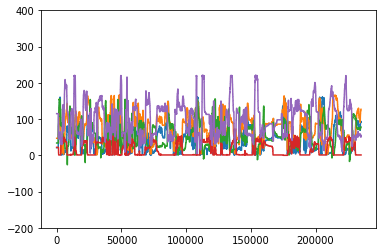

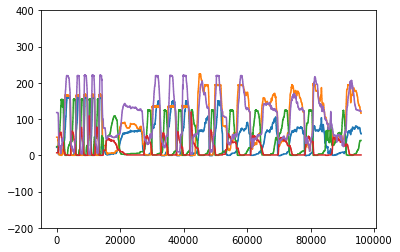

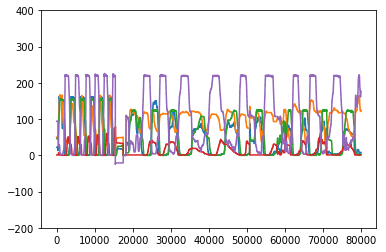

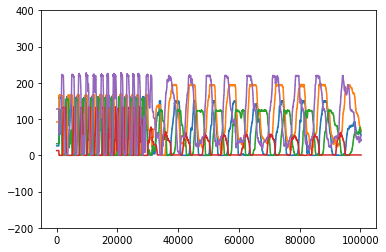

In [78]:
for i in np.unique(y):
    plt.plot(X[y == i][:])
    plt.ylim(-200,400)
    plt.show()

In [89]:
mu = X.mean(axis=-1,keepdims=True)
sd = 1e-5 + X.std(axis=-1,keepdims=True)
X_ = (X - mu) / sd

In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
f = pca.fit_transform(X_)

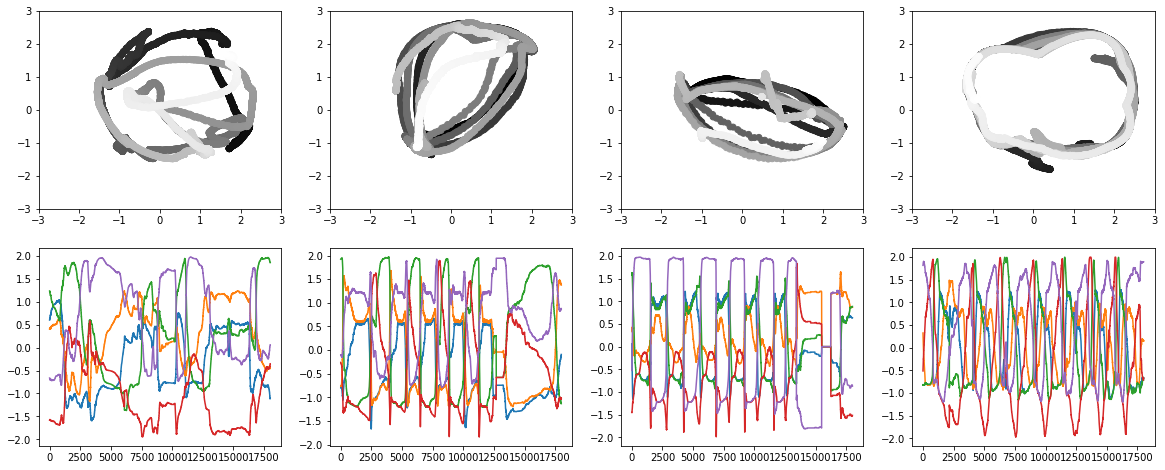

In [150]:
fig, axes = plt.subplots(2,4,figsize=(20,8))

id_start = 2000
id_stop  = 20000
idc = slice(id_start, id_stop)

for i in np.unique(y).astype("int"):
    c = np.arange(len(f[y==i,0][idc]))
    axes[0,i].scatter(f[y==i,0][idc], f[y==i,1][idc], c = c, cmap="gray")
    axes[0,i].set_xlim([-3,3])
    axes[0,i].set_ylim([-3,3])
    
    axes[1,i].plot(X_[y==i][idc])

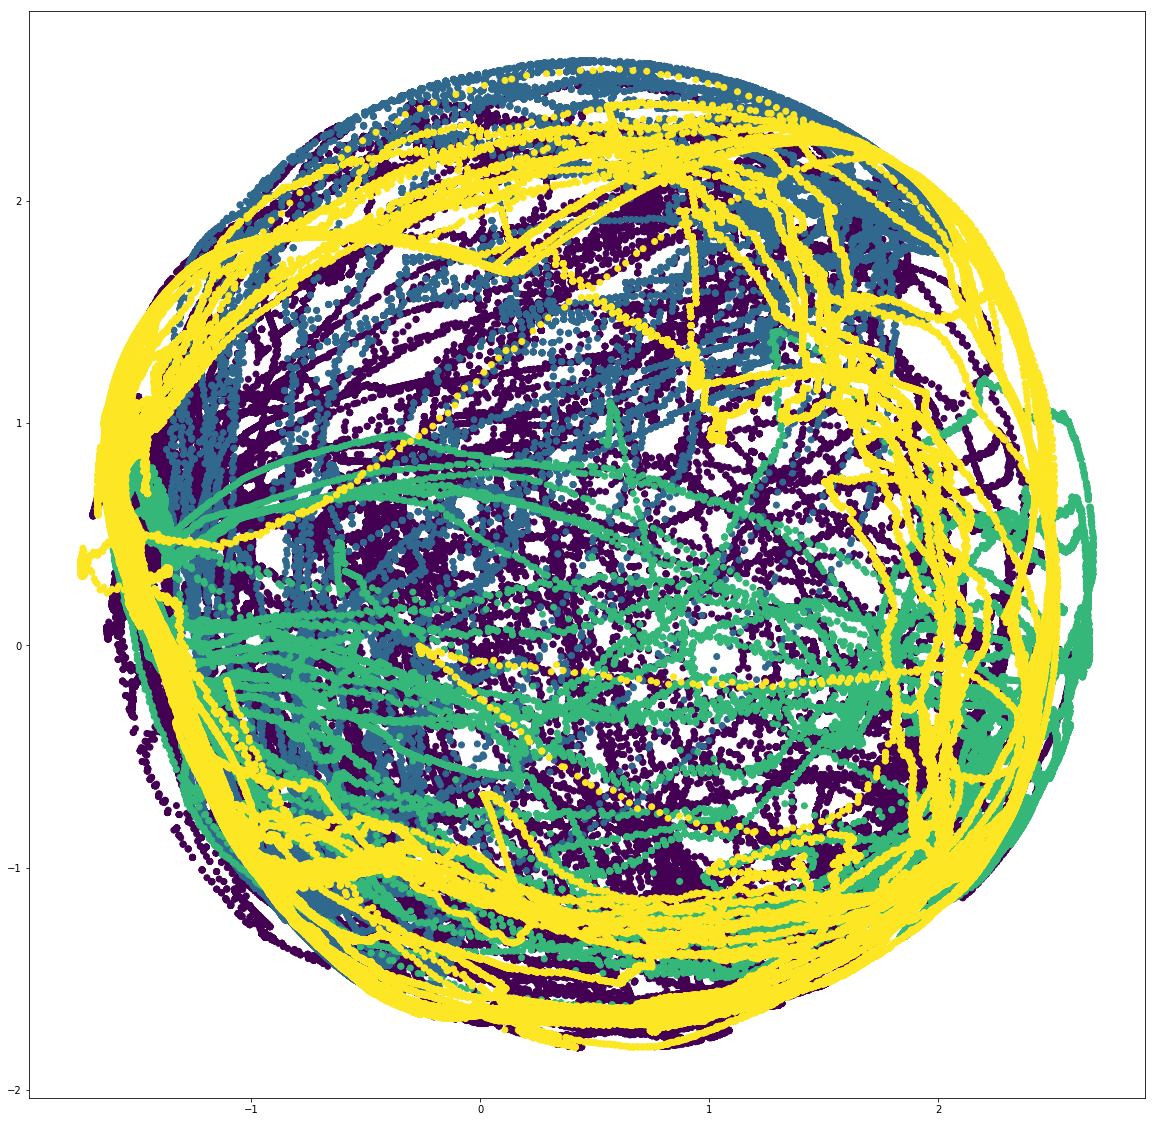

In [127]:
plt.figure(figsize=(20,20))
plt.scatter(f[:,0], f[:,1], c = y)

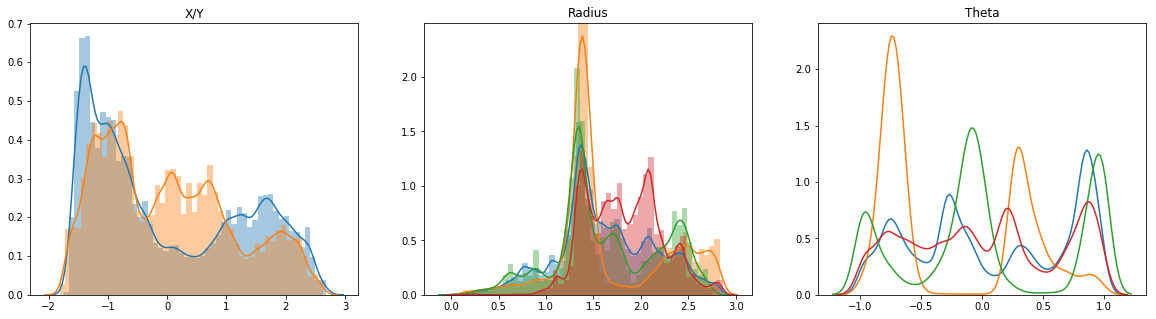

In [141]:
import seaborn as sns

fig, axes = plt.subplots(1,3,figsize=(20,5))
titles = ['X/Y', 'Radius', 'Theta']

sns.distplot(f[:,0],ax=axes[0])
sns.distplot(f[:,1],ax=axes[0])

r = (f[:,0]**2 + f[:,1]**2)**0.5
theta = np.arctan2(f[:,1], f[:,0]) / np.pi

sns.distplot(r,ax=axes[1])
sns.distplot(r[y==1],ax=axes[1])
sns.distplot(r[y==2],ax=axes[1])
sns.distplot(r[y==3],ax=axes[1])

#sns.distplot(theta,ax=axes[2])
sns.distplot(theta[y==0],ax=axes[2],hist=None)
sns.distplot(theta[y==1],ax=axes[2],hist=None)
sns.distplot(theta[y==2],ax=axes[2],hist=None)
sns.distplot(theta[y==3],ax=axes[2],hist=None)

for ax, t in zip(axes.flatten(), titles): ax.set_title(t)

plt.show()

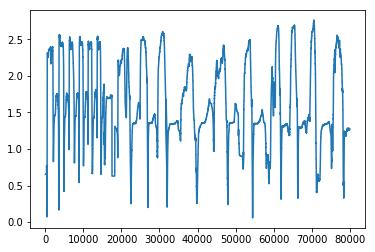

In [148]:
plt.plot(r[y==2])

In [110]:
from sklearn.manifold import TSNE

patches = f[:511200].reshape(-1,100*2)
tsne = TSNE()
embedding = tsne.fit_transform(patches)

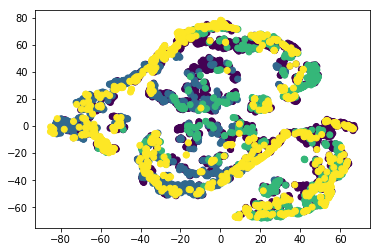

In [113]:
plt.scatter(embedding[:,0], embedding[:,1], c = y[:511200:100])

plt.show()